# Introduction

**Milestone 2**  
Nama: Achmad Raihan  
Batch: RMT - 036

**Gambaran Dataset:**  
[Student Perfornance Factors](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors) merupakan data yang berisikan tentang faktor yang memengaruhi hasil ujian akhir siswa.

**Latar Belakang:**  
Pendidikan merupakan sektor paling penting untuk membangun generasi bangsa yang cerah di masa depan. Namun, dalam beberapa hari terakhir berbagai berita memuat terkait menurunnya kualitas pendidikan di Indonesia. Berdasarkan informasi tersebut, diperoleh data terkait nilai ujian dan faktor yang memengaruhinya. Program ini dibuat untuk memperkirakan nilai ujian akhir yang diperoleh seseorang berdasarkan faktor yang memengaruhinya.
- Berdasarkan data pada nilai ujian, persebaran data sekitar diantara 55 hingga 75 (sangat sedikit orang yang memperoleh nilai diatas 75).
- Bagi mereka yang memperoleh nilai dibawah 70, akan diberikan rekomendasi terkait hal-hal yang harus diperbaiki. Rekomendasi tersebut diberikan berupa parameter/*features*/gaya hidup yang harus diperbaiki dalam menjalani kehidupannya sehingga dapat menjadi bahan evaluasi bagi mereka yang mendapatkan nilai rendah untuk menyadari penyebab gaya hidup yang terbentuk selama ini, apakah sudah cukup bagus untuk dapat mewujudkan ambisi tinggi yang mereka inginkan atau belum. Parameter tersebut diperoleh berdasarkan hasil uji korelasi parameter/*features* terhadap target (pengaruh/korelasi *features* terhadap target)

**Objektif:**  
- Menganalisis faktor yang memengaruhi siswa terhadap hasil ujian yang diperolehnya.
- Membuat program yang mampu memperkirakan hasil ujian akhir siswa berdasarkan faktor yang memengaruhinya.
- Rekomendasi terhadap siswa yang nilainya dibawah 70.

**Justifikasi:**  
- [Kriteria Kelulusan Minimal](https://www.quipper.com/id/blog/info-guru/kriteria-ketuntasan-minimal/#Prinsip_penetapan_Kriteria_Ketuntasan_Minimal)  
- [Tanggapan pengamat terkait skor PISA yang menurun](https://news.republika.co.id/berita/sliclh483/skor-pisa-ri-jeblok-semasa-rezim-nadiem-makarim-apa-yang-harus-dibenahi-prof-muti-part3)
- [Berita terkait skor PISA yang menurun](https://www.kompas.id/baca/humaniora/2023/12/10/hasil-pisa-2022-krisis-belajar-yang-belum-juga-menemukan-ujungnya)

# Import Libraries

In [93]:
# Proses data
import pandas as pd 
import numpy as np

# Visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Features Engineering
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
import phik
from phik.report import plot_correlation_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

# Modeling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
# Hyperparameter Tuning
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
# Model Evaluation
from sklearn.metrics import r2_score
# Model Saving
import pickle
import json

# Data Loading

In [59]:
data = pd.read_csv('StudentPerformanceFactors.csv')
df = data.copy()

In [60]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


### Data Information

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [6]:
df.duplicated().sum()

0

Berdasarkan informasi diatas, terdapat beberapa hal yang dapat disampaikan, yaitu:
- Tidak ada satupun data yang duplikat.
- Terdapat 3 kolom yang *missing values*.
- Secara keseluruhan terdapat 20 kolom dimana salah satunya akan menjadi *target* yaitu `Exam_Score` dan sisanya akan menjadi *features*.

# Exploratory Data Analysis

### Faktor yang Memengaruhi Seseorang Memperoleh Hasil Ujian

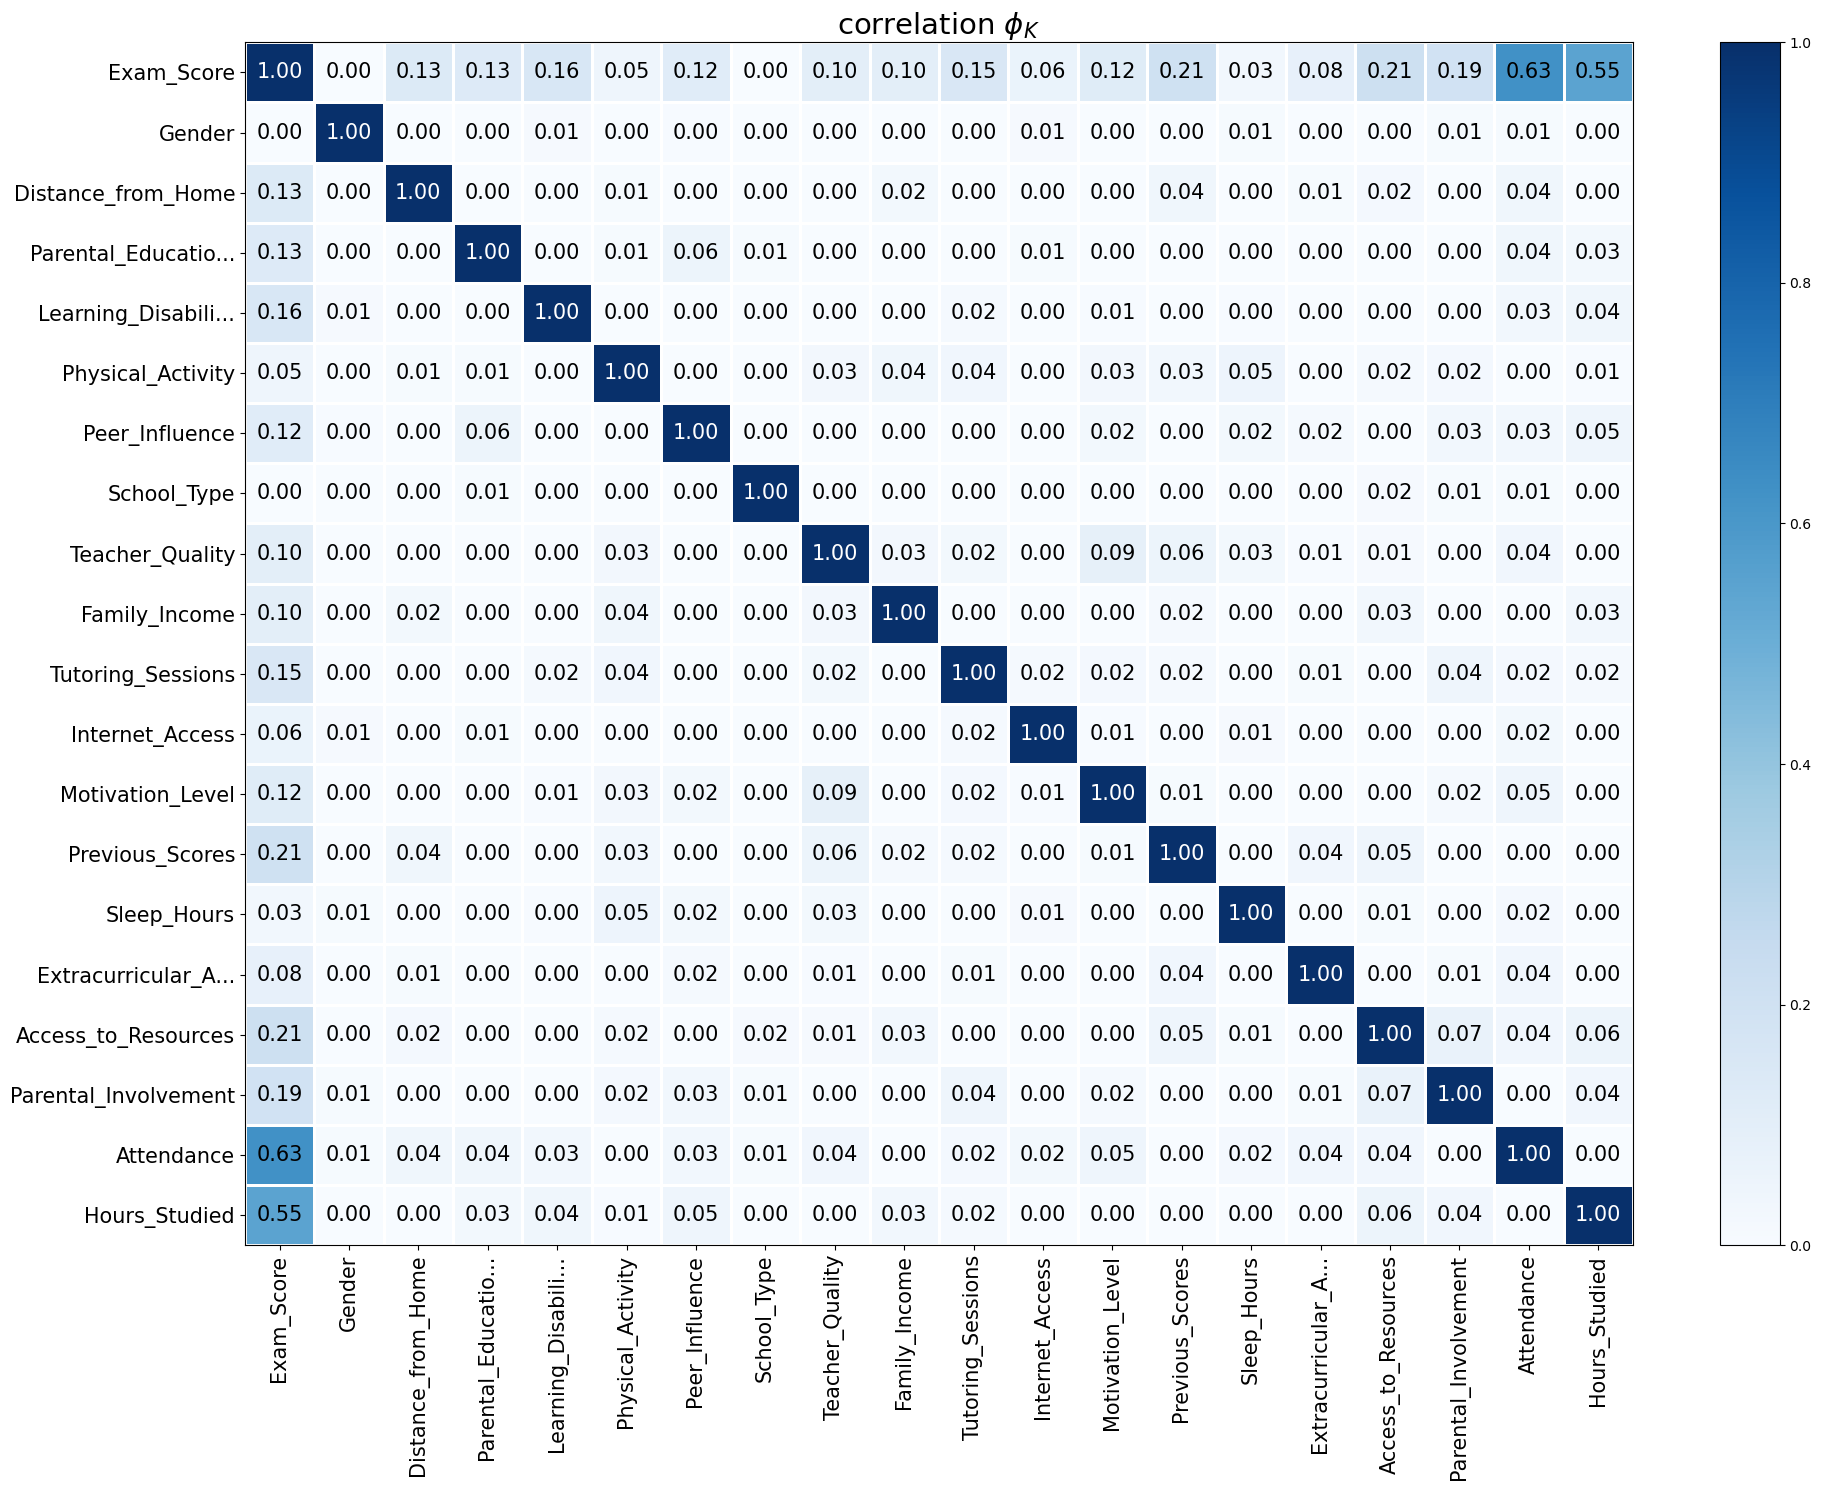

In [7]:
faktor = df.phik_matrix(interval_cols=['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Physical_Activity', 'Exam_Score'])
# interval cols artinya memilih kolom yang numerik

plot_correlation_matrix(faktor.values, x_labels=faktor.columns, y_labels=faktor.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5, 
                        figsize=(20,15))
plt.tight_layout()

Berdasarkan informasi diatas, 2 faktor yang memengaruhi seseorang dalam memperoleh `Exam_Score`, yaitu:
- `Attendance`: Kehadiran seseorang di sekolah sangatlah penting, karena dalam sekolah, terdapat berbagai sumber yang bisa dijangkau oleh para siswa sehingga memperoleh `Exam_Score` yang bagus walaupun sarana dan prasarana yang ada di rumah kurang mendukung pembelajarannya. Misalnya di sekolah terdapat perpustakaan, mentor dari teman, minta bantuan kepada guru secara langsung terkait materi yang tidak dimengerti, dan lain-lain. 
- `Hours_Studied`: Jam belajar merupakan faktor yang wajar dalam memengaruhi `Exam_Score` yang diperoleh seseorang, karena bukanlah usaha yang mudah untuk bisa memperoleh hasil tersebut, tidak sedikit seseorang membutuhkan waktu yang cukup lama untuk memahami suatu materi pembelajarannya.

### Durasi Waktu Belajar Ideal

Berdasarkan justifikasi kriteria kelulusan minimum pada **Introduction**, maka diberi batasan pada nilai ujian minimal 70 sehingga dapat mengetahui secara mendalam untuk analisis kedepannya. 

In [8]:
nilai70 = df[df['Exam_Score'] >= 70]


print(f'Durasi ideal seseorang belajar dalam semunggu sehingga memperoleh Exam Score yang bagus yaitu {nilai70['Hours_Studied'].mean()} jam')

Durasi ideal seseorang belajar dalam semunggu sehingga memperoleh Exam Score yang bagus yaitu 23.873846153846152 jam


### Persentase Kehadiran Ideal

In [9]:
print(f'Persentase kehadiran ideal seseorang ke kelas sehingga memperoleh Exam Score yang bagus yaitu {nilai70['Attendance'].mean()}%')

Persentase kehadiran ideal seseorang ke kelas sehingga memperoleh Exam Score yang bagus yaitu 89.98215384615385%


### Banyaknya Siswa dengan Variasi Jarak dari Rumah Menuju Sekolah

In [10]:
jarak = df[['Distance_from_Home', 'Exam_Score']].groupby(['Distance_from_Home']).count().rename(columns={'Exam_Score': 'Total Siswa'})
jarak

,Total Siswa
Distance_from_Home,
Far,658
Moderate,1998
Near,3884


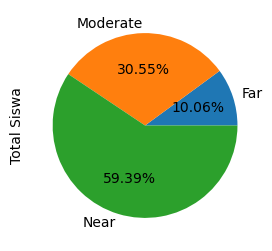

In [11]:
# Visualisasi persentase jarak tempuh yang dilalui siswa dari rumah menuju sekolah
fig,ax1 = plt.subplots(figsize=(3,3))

jarak['Total Siswa'].plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.show()

Berdasarkan informasi diatas, jarak tempuh yang dilalui mayoritas siswa dari rumah menuju sekolah cukup dekat.

### Hubungan Tingkat Motivasi Belajar terhadap `Exam_Score`

In [12]:
motivation = df[['Motivation_Level', 'Exam_Score']].groupby(['Motivation_Level']).mean()
motivation

,Exam_Score
Motivation_Level,
High,67.704321
Low,66.752194
Medium,67.330648


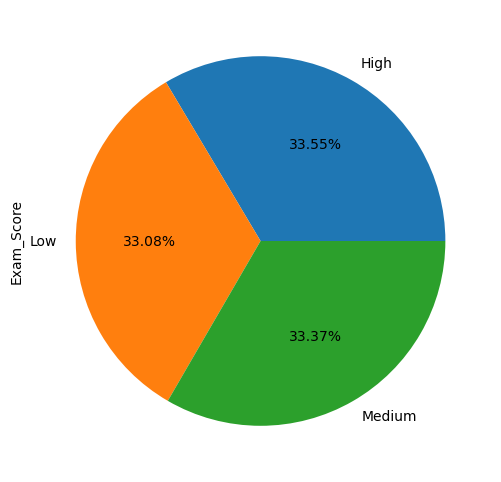

In [13]:
# Visualisasi persentase Hubungan Tingkat Motivasi Belajar terhadap `Exam_Score`
fig,ax1 = plt.subplots(figsize=(6,6))

motivation['Exam_Score'].plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.show()

Berdasarkan informasi diatas, motivasi siswa dalam belajar memengaruhi `Exam_Score` yang diperoleh. Ini akan menjadi tantangan bagi berbagai pihak agar siswa termotivasi untuk belajar demi mencetak **Generasi Emas Indonesia 2045**.

### Peran Orang Tua dalam Memengaruhi Pembelajaran Siswa

In [14]:
parent = df[['Parental_Involvement', 'Exam_Score']].groupby(['Parental_Involvement']).mean()
parent

,Exam_Score
Parental_Involvement,
High,68.092767
Low,66.358265
Medium,67.098156


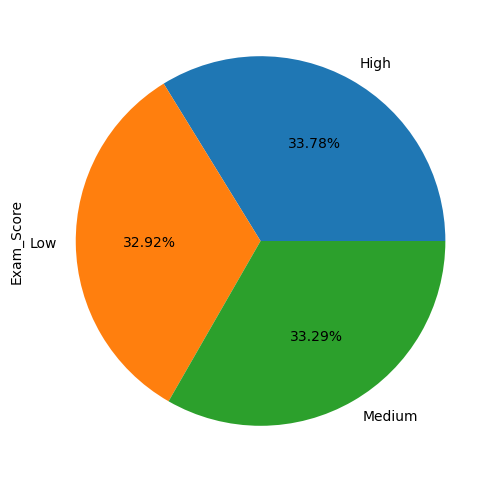

In [15]:
# Visualisasi persentase Peran Orang Tua dalam Memengaruhi Pembelajaran Siswa
fig,ax1 = plt.subplots(figsize=(6,6))

parent['Exam_Score'].plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.show()

Berdasarkan informasi diatas, peran orang tua penting dalam belajar memengaruhi pembelajaran siswa. Hal itu disebabkan sehebat apapun guru dalam mengajar, orang tua merupakan satu-satunya orang yang paling dekat dan mengenal anaknya sendiri sehingga penting dalam pendidikan.

### Sarana Prasarana yang Berpengaruh dalam Pembelajaran Siswa

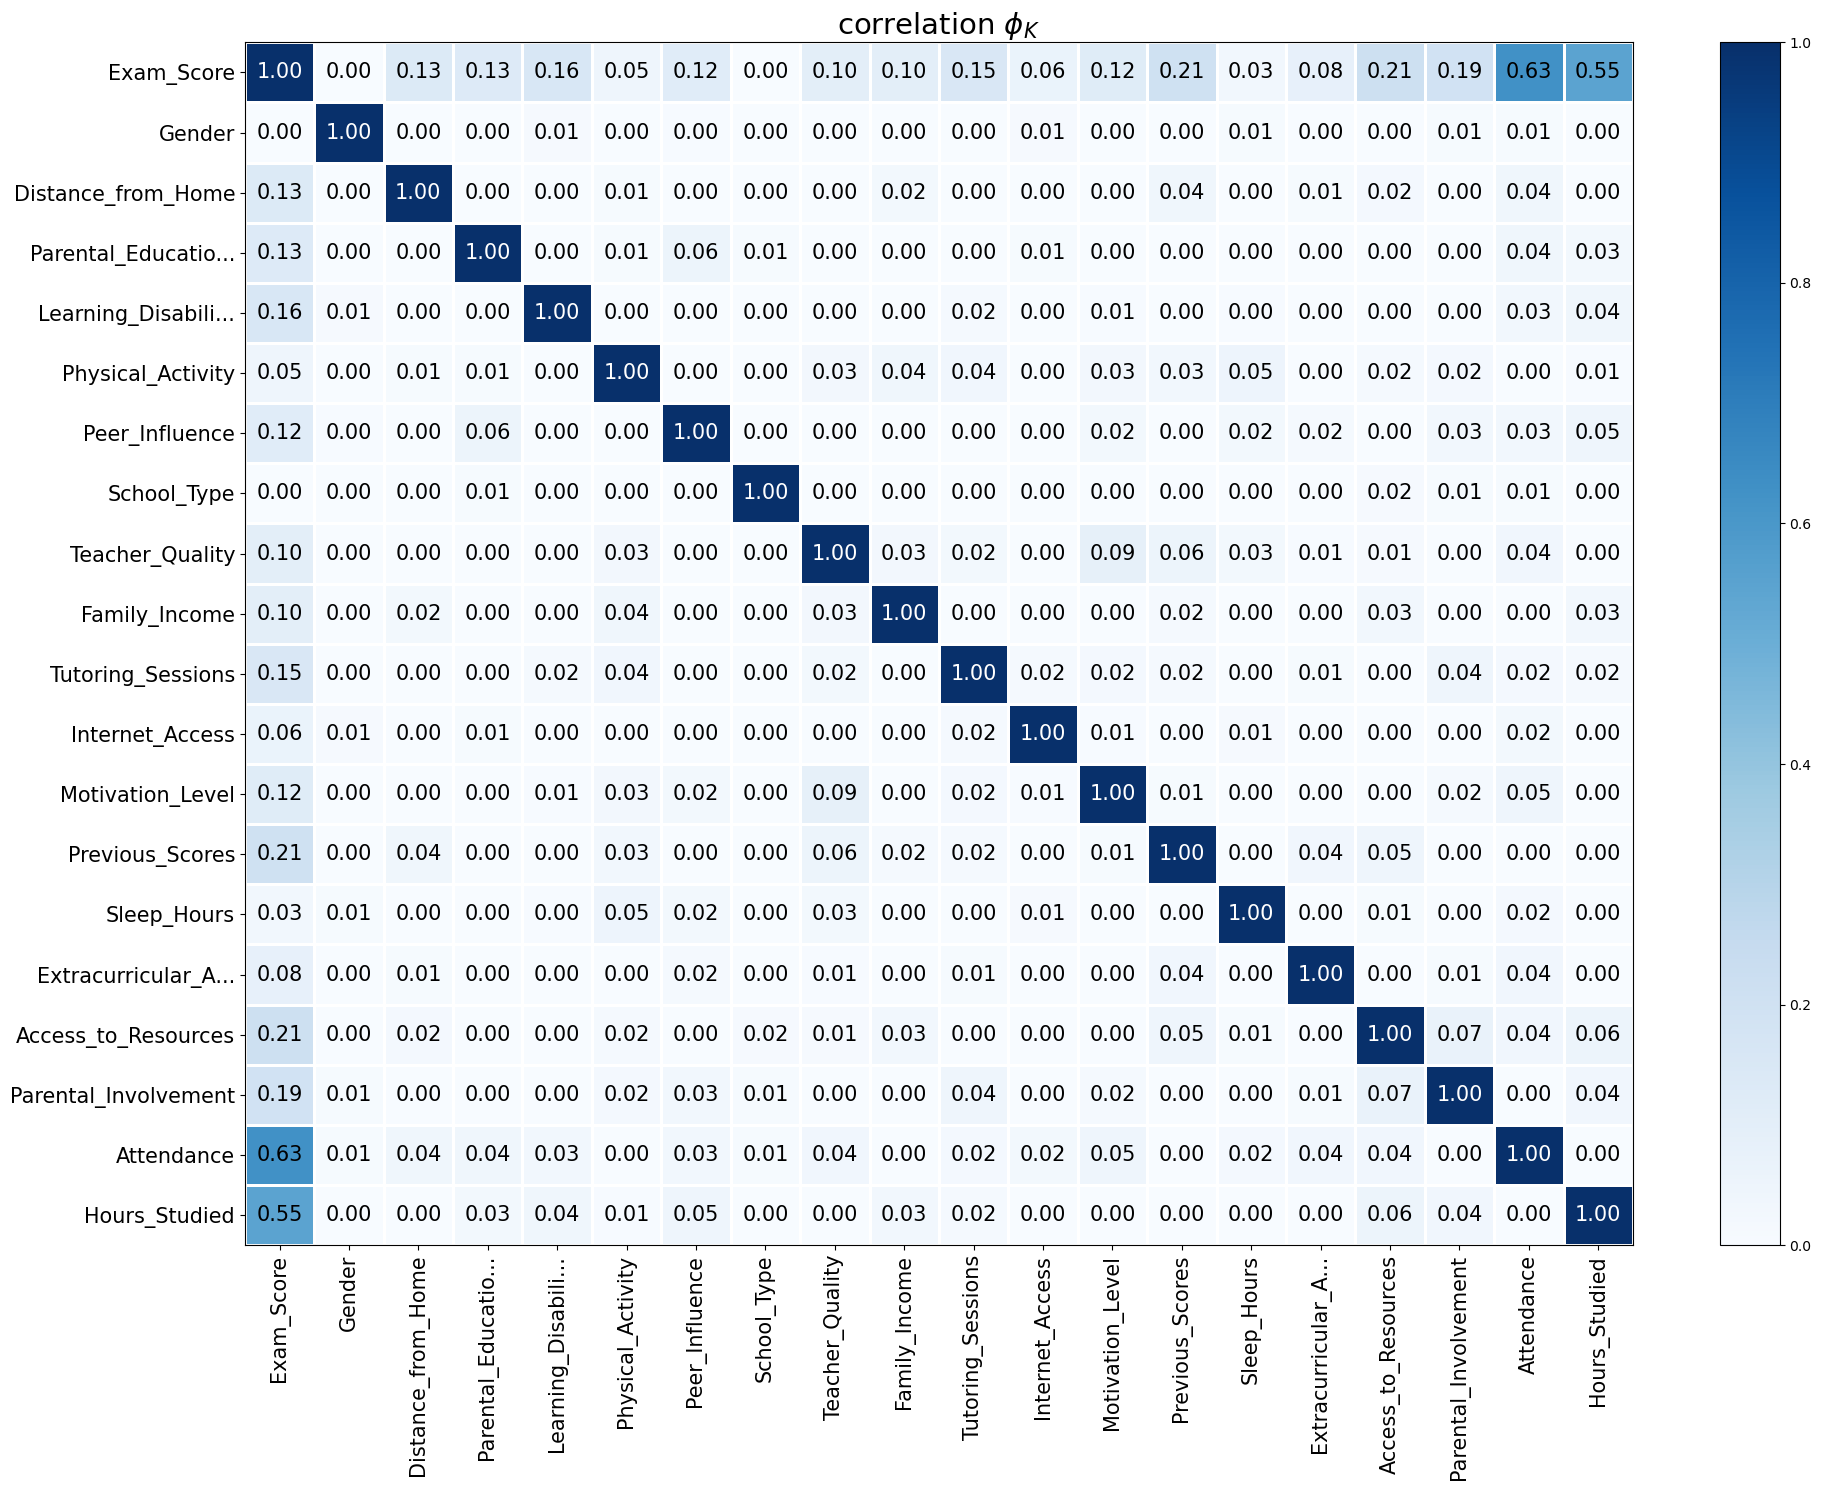

In [16]:
# interval cols artinya memilih kolom yang numerik
sarana = df.phik_matrix(interval_cols=['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Physical_Activity', 'Exam_Score'])

plot_correlation_matrix(sarana.values, x_labels=sarana.columns, y_labels=sarana.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(20,15))
plt.tight_layout()

Berdasarkan informasi diatas, `Hours_Studied` dan `Attendance` merupakan faktor yang memengaruhi secara langsung terkait `Exam_Score` yang diperoleh tiap siswa. Meskipun begitu, terdapat sarana prasarana berikut yang merupakan penunjang faktor yang berasal dari pihak sekolah atau orang tua secara tidak langsung terkait pengaruh siswa dalam memperoleh `Exam_Score` yang tinggi, yaitu:
- `Parental_Involvement`: Dalam data yang diperoleh, orang tua memiliki peran penting dalam memengaruhi `Exam_Score` anaknya. Hal itu hal wajar karena tidak semua orang tua memiliki waktu luang untuk bercengkrama dengan anaknya yang umumnya disebabkan tuntuan pekerjaan atau hal lainnya. Meskipun begitu, orang tua adalah yang paling mengenal anaknya sehingga mereka sangat paham terkait faktor baik buruk perilaku yang dialami anaknya.
- `Access_to_Resources`: Faktor ini penting di setiap sekolah karena sangat membantu siswa yang memiliki sarana prasarana yang kurang mendukung dirumahnya dalam pembelajaran.
- `Previous_Scores`: Faktor ini penting sebagai acuan guru untuk menilai kemampuan para siswanya dalam menghadapi Ujian Akhir, begitupun dengan para siswa sebagai bahan evaluasi untuk dapat meningkatkan persiapannya dalam memperoleh `Exam_Score` yang bagus.
- `Tutoring_Sessions`: Faktor ini penting karena tidak semua murid mampu menerima materi yang disampaikan para guru dengan cara mengajar yang dibawakan para guru. Oleh karena itu, biasanya para murid mencari para mentor yang dapat memahami mereka terkait cara menguasai materi pembelajaran, baik itu temannya sendiri, mencari pengajar yang berkarir di luar lingkup sekolahnya, atau melakukan sesi privat dengan guru sewaktu sekolah di luar jam belajar jika guru tersebut berkenan.
- `Learning_Disabilities`: Faktor ini penting karena dapat menunjang para disabilitas dalam pembelajaran di sekolah sehingga mereka memiliki peluang yang sama untuk dapat mencapai `Exam_Score` yang bagus.

# Features Engineering

### Cardinality

In [17]:
# Periksa cardinality setiap kolom
cardinality = []
kolom = df[['Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 
       'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 
       'School_Type', 'Peer_Influence', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender']].columns

for col in kolom:
    cardinality.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['kolom', 'jumlah nilai unique', 'nilai unique'], data=cardinality)

,kolom,jumlah nilai unique,nilai unique
0,Parental_Involvement,3,"[Low, Medium, High]"
1,Access_to_Resources,3,"[High, Medium, Low]"
2,Extracurricular_Activities,2,"[No, Yes]"
3,Motivation_Level,3,"[Low, Medium, High]"
4,Internet_Access,2,"[Yes, No]"
5,Tutoring_Sessions,9,"[0, 2, 1, 3, 4, 5, 6, 7, 8]"
6,Family_Income,3,"[Low, Medium, High]"
7,Teacher_Quality,3,"[Medium, High, Low, nan]"
8,School_Type,2,"[Public, Private]"
9,Peer_Influence,3,"[Positive, Negative, Neutral]"


Semua kolom kategorik yang tercantum bersifat *Low Cardinality* sehingga mereka berpotensi dapat digunakan untuk *modeling*.

### Outlier

- Periksa distribusi tiap kolom (normal/*skew*).
- Periksa *outlier* tiap kolom.
  - lebih dari 5%: ***capping***, dimana umumnya pakai Winsorizer.
  - kurang dari  5%: lihat banyaknya data, jika ada banyak **dapat *trimming***, jika sedikit **jangan *trimming***.

In [18]:
# Periksa distribusi setiap kolom
numerik = df[[
       'Hours_Studied', 'Attendance', 'Sleep_Hours',
       'Previous_Scores', 'Physical_Activity'
]].columns
itemm= []

for col in numerik:
    itemm.append([col, 
                  round(df[col].skew(),1), 
                  np.where((round(df[col].skew(),1) <= 0.5) & (round(df[col].skew(),1) >= -0.5), 'normal','skew')
                ])

skewness = pd.DataFrame(columns=['kolom', 'nilai', 'distribusi'], data= itemm)
skewness

,kolom,nilai,distribusi
0,Hours_Studied,0.0,normal
1,Attendance,0.0,normal
2,Sleep_Hours,-0.0,normal
3,Previous_Scores,-0.0,normal
4,Physical_Activity,-0.0,normal


In [19]:
# Get upper, lower boundaries and percentage of outliers
column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)):
    col = skewness['kolom'][row]

    fold = 3 # semacam threshold agar data bisa masuk boundary atau tidak

    #checking upper and lower boundary
    if skewness['distribusi'][row] == 'skew':
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (IQR * fold)
        upper_boundary = df[col].quantile(0.75) + (IQR * fold)
    else:
        lower_boundary = df[col].mean() - fold* df[col].std()
        upper_boundary = df[col].mean() + fold* df[col].std()
        
    # total persentase outlier setiap kolom
    totout = ((len(df[df[col] > upper_boundary]) / len(df) * 100) + (len(df[df[col] < lower_boundary]) / len(df) * 100))
    
    #append to list
    column.append(col)
    lower_bound.append(lower_boundary)
    upper_bound.append(upper_boundary)
    percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'column': column,
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,Hours_Studied,37.95,2.00,0.38
1,Attendance,114.62,45.34,0.00
2,Sleep_Hours,11.43,2.62,0.00
3,Previous_Scores,118.27,31.87,0.00
4,Physical_Activity,6.06,-0.13,0.00


Berdasarkan informasi diatas, hanya `Hours_Studied` yang memiliki *outlier* dan berdistribusi normal dan yang lainnya memiliki data yang bersih.

In [62]:
# Capping untuk meminimalisir adanya outlier

winsoriser = Winsorizer(capping_method='gaussian', # handling menggunakan method gaussian karena distribusi normal
                        tail='both', # capping outliers berdasarkan sisi skew nya, both artinya capping di kedua sisi
                        fold=3, # dengan outlier dan normal distribusinya, maka fold yang digunakan yaitu 3 sesuai pengali terhadap standar deviasinya di perhitungan diatas
                        variables=['Hours_Studied'], # features yang ingin di handle
                        missing_values='ignore') # mengabaikan timbulnya error dalam proses capping

df_capped = winsoriser.fit_transform(df)

Hours_Studied - Before Capping


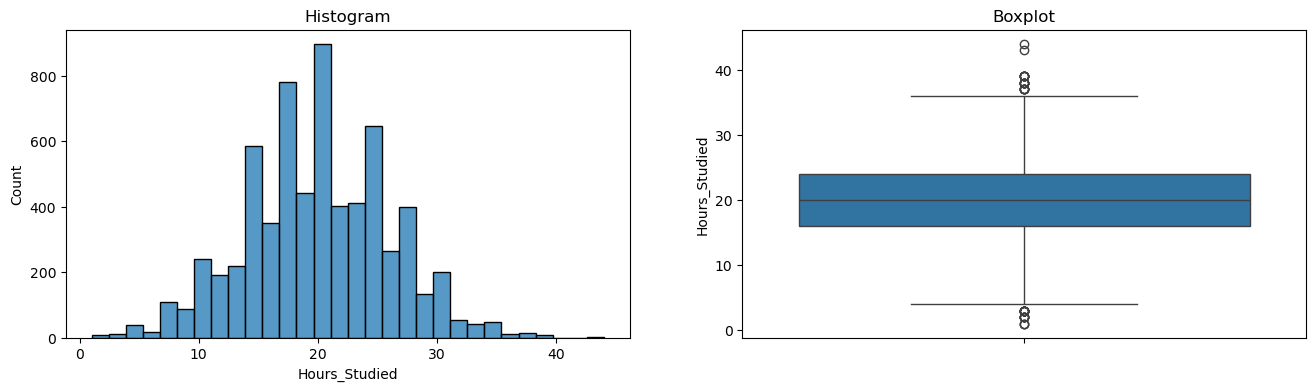


Hours_Studied - After Capping


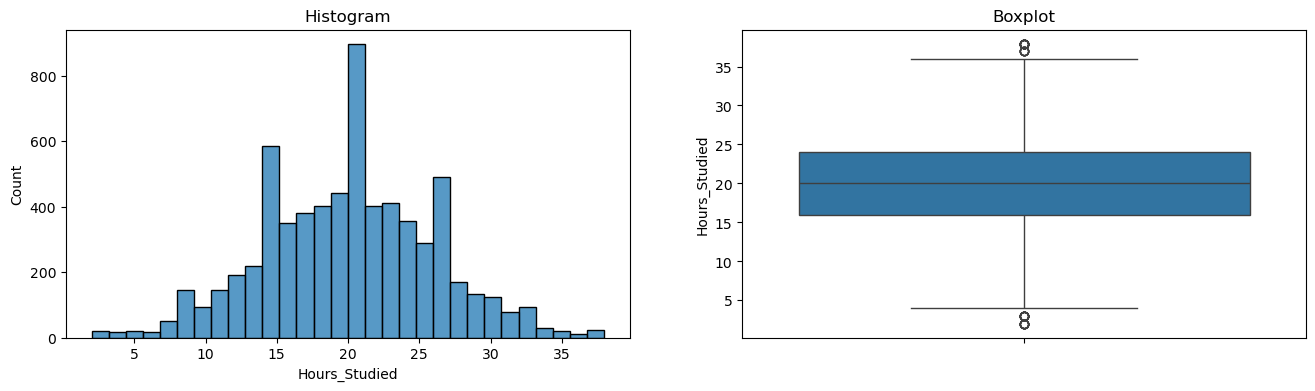

Attendance - Before Capping


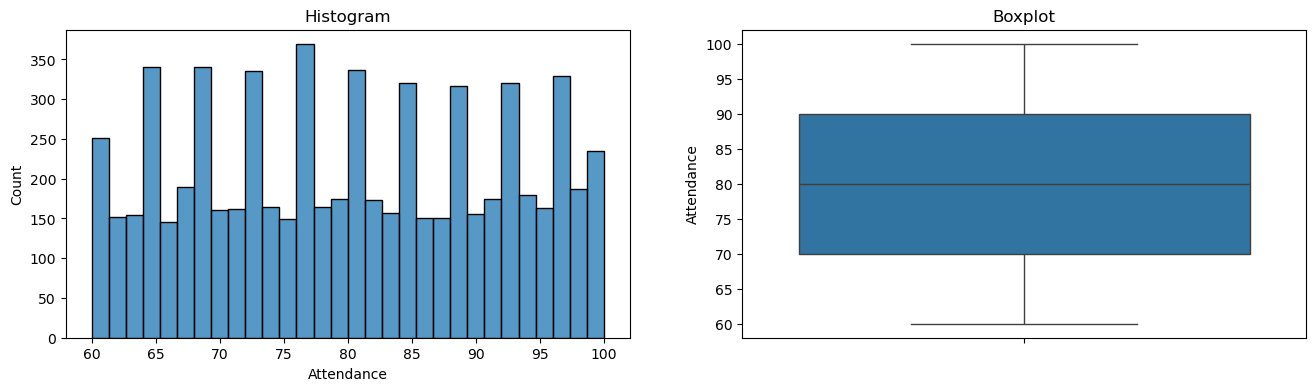


Attendance - After Capping


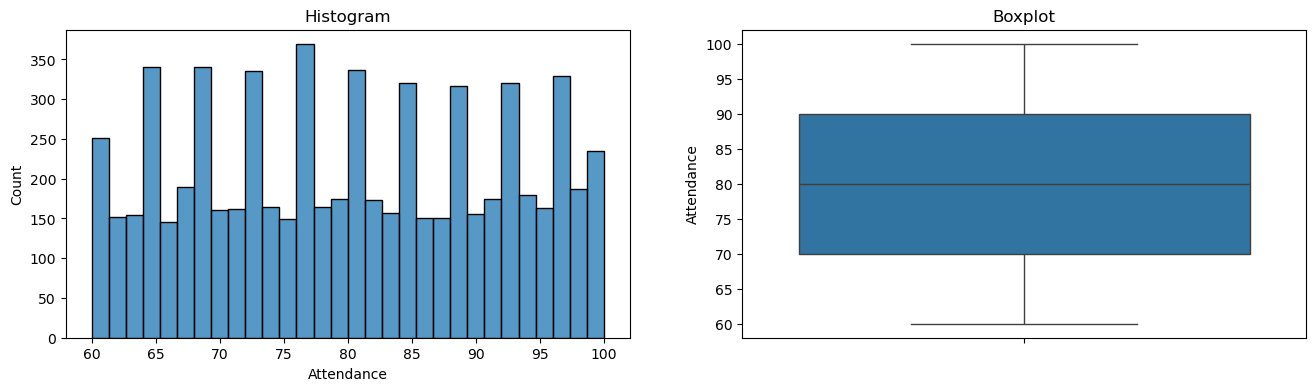

Sleep_Hours - Before Capping


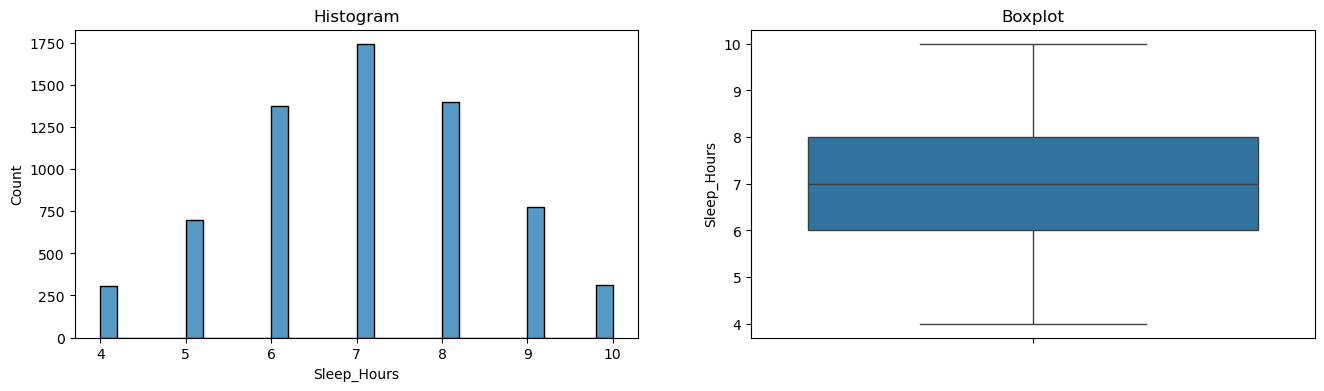


Sleep_Hours - After Capping


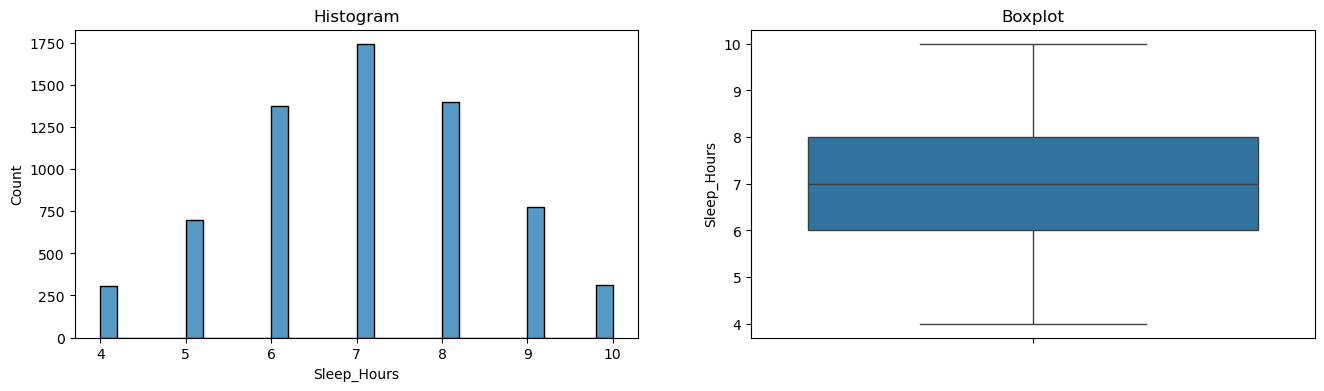

Previous_Scores - Before Capping


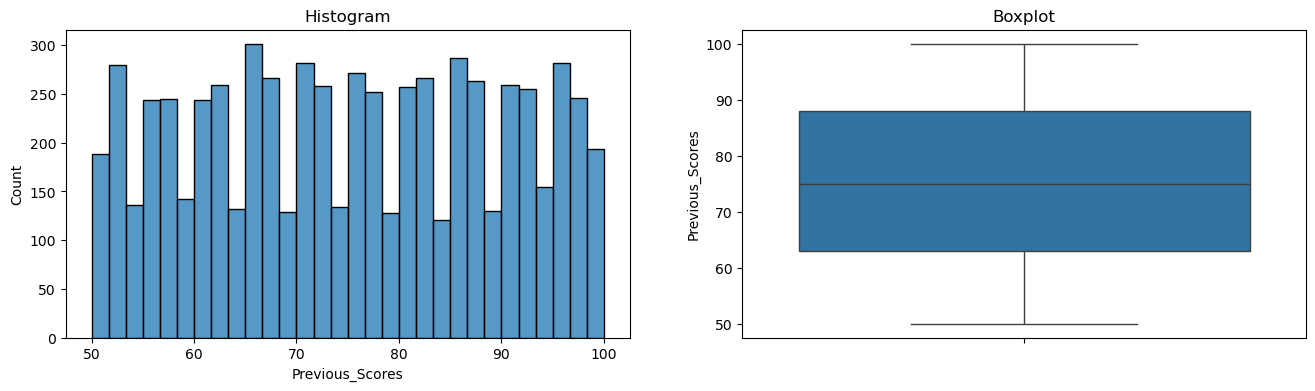


Previous_Scores - After Capping


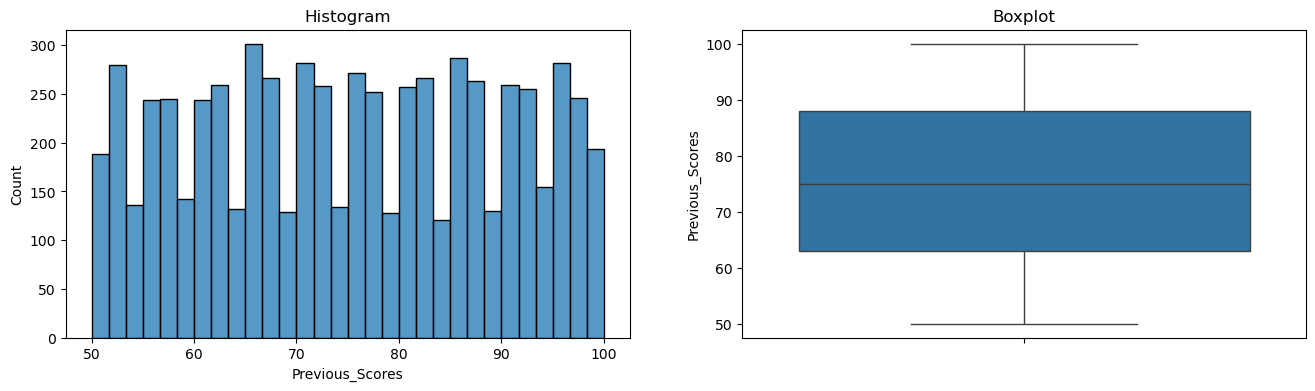

Physical_Activity - Before Capping


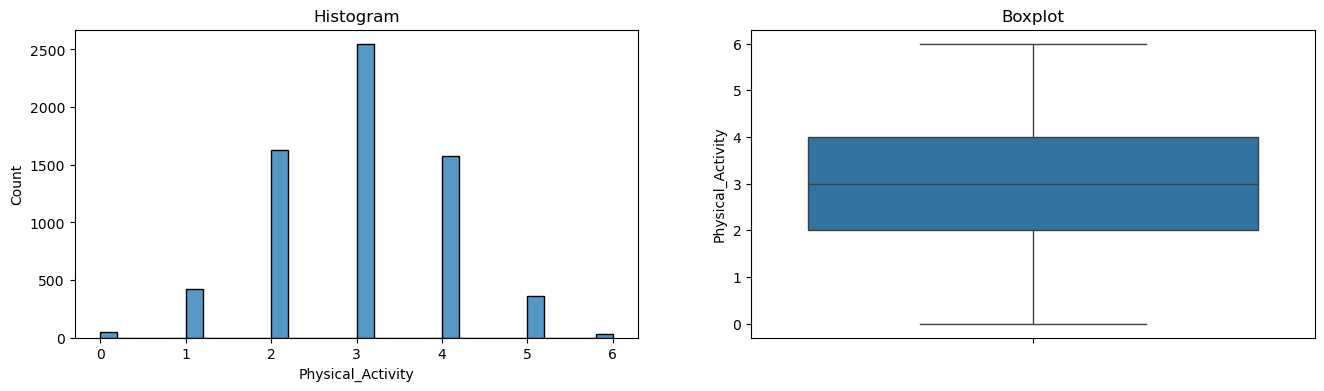


Physical_Activity - After Capping


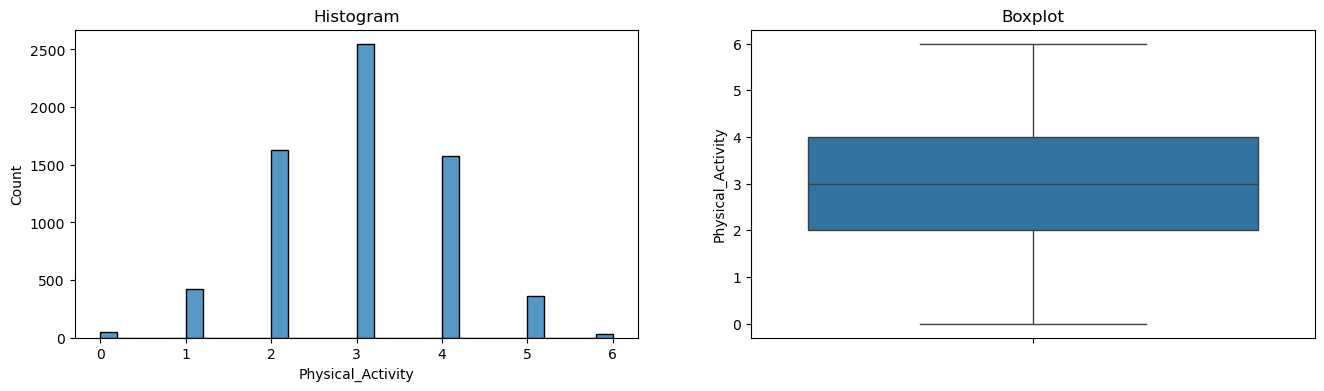

In [23]:
# function untuk display plot before after capped
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()  

# Check the distribution before and after capping
for col in numerik:
    print(f'{col} - Before Capping')
    diagnostic_plots(df, col)

    print(f'\n{col} - After Capping')
    diagnostic_plots(df_capped, col)

### Missing Values

In [70]:
df_capped.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [25]:
# Count How Many Observations that Would Drop

dataaa = df_capped.copy()
print('Total data seluruhnya               : ', dataaa.shape[0])
print('Total data setelah menghilangkan baris yang terdapat missing values : ', dataaa.dropna().shape[0])
print('Persentase data tersisa setelah menghilangkan missing values  : ', dataaa.dropna().shape[0] / np.float64(dataaa.shape[0]) * 100,'%')

Total data seluruhnya               :  6607
Total data setelah menghilangkan baris yang terdapat missing values :  6378
Persentase data tersisa setelah menghilangkan missing values  :  96.5339791130619 %


Berdasarkan deskripsi pada [sumber dataset](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors), dapat diketahui bahwa tiap *features* yang memiliki *missing values* tidak memiliki korelasi dengan yang lainnya. Dengan kata lain mereka merupakan ***Misiing Values Complete A Random***. Berdasarkan informasi diatasn, *drop* merupakan penanganan yang dapat dilakukan untuk mengatasi *missing values* yang terdapat pada suatu baris.

In [71]:
df_capped = df_capped.dropna()

In [27]:
df_capped.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

### Features Selection

In [28]:
# interval cols artinya memilih kolom yang numerik
phik_overview = df_capped.phik_matrix(interval_cols=['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Physical_Activity', 'Exam_Score'])
phik_overview

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
Hours_Studied,1.000000,0.000000,0.020079,0.037660,0.000000,0.013769,0.000000,0.000000,0.000000,0.039193,0.045879,0.000000,0.020708,0.038701,0.000000,0.000000,0.022359,0.000000,0.000000,0.536394
Attendance,0.000000,1.000000,0.000000,0.030707,0.036102,0.019560,0.000000,0.037896,0.024361,0.012726,0.000000,0.041632,0.026705,0.037259,0.000000,0.035731,0.044246,0.040046,0.000000,0.627831
Parental_Involvement,0.020079,0.000000,1.000000,0.076549,0.011039,0.000000,0.000000,0.001129,0.000000,0.049550,0.019291,0.000000,0.005578,0.030089,0.026311,0.000000,0.000000,0.000000,0.011675,0.193146
Access_to_Resources,0.037660,0.030707,0.076549,1.000000,0.004612,0.009014,0.046970,0.000000,0.003109,0.031813,0.003132,0.000000,0.017876,0.000000,0.019004,0.000000,0.000000,0.039014,0.000000,0.210384
Extracurricular_Activities,0.000000,0.036102,0.011039,0.004612,1.000000,0.000000,0.027165,0.000000,0.000000,0.008389,0.000000,0.005019,0.000000,0.015370,0.000000,0.000000,0.000000,0.013126,0.000000,0.078948
Sleep_Hours,0.013769,0.019560,0.000000,0.009014,0.000000,1.000000,0.000000,0.000000,0.015616,0.000000,0.000000,0.029571,0.000000,0.024315,0.042334,0.000000,0.000000,0.000000,0.016215,0.028652
Previous_Scores,0.000000,0.000000,0.000000,0.046970,0.027165,0.000000,1.000000,0.014154,0.000000,0.026943,0.025222,0.060287,0.000000,0.000000,0.039963,0.000000,0.000000,0.039641,0.000000,0.205910
Motivation_Level,0.000000,0.037896,0.001129,0.000000,0.000000,0.000000,0.014154,1.000000,0.008840,0.000000,0.000000,0.093373,0.000000,0.028201,0.032234,0.007659,0.000000,0.000000,0.000000,0.123907
Internet_Access,0.000000,0.024361,0.000000,0.003109,0.000000,0.015616,0.000000,0.008840,1.000000,0.020445,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009809,0.000000,0.010875,0.064781
Tutoring_Sessions,0.039193,0.012726,0.049550,0.031813,0.008389,0.000000,0.026943,0.000000,0.020445,1.000000,0.000000,0.025798,0.000000,0.000000,0.039202,0.012604,0.000000,0.000000,0.000000,0.154732


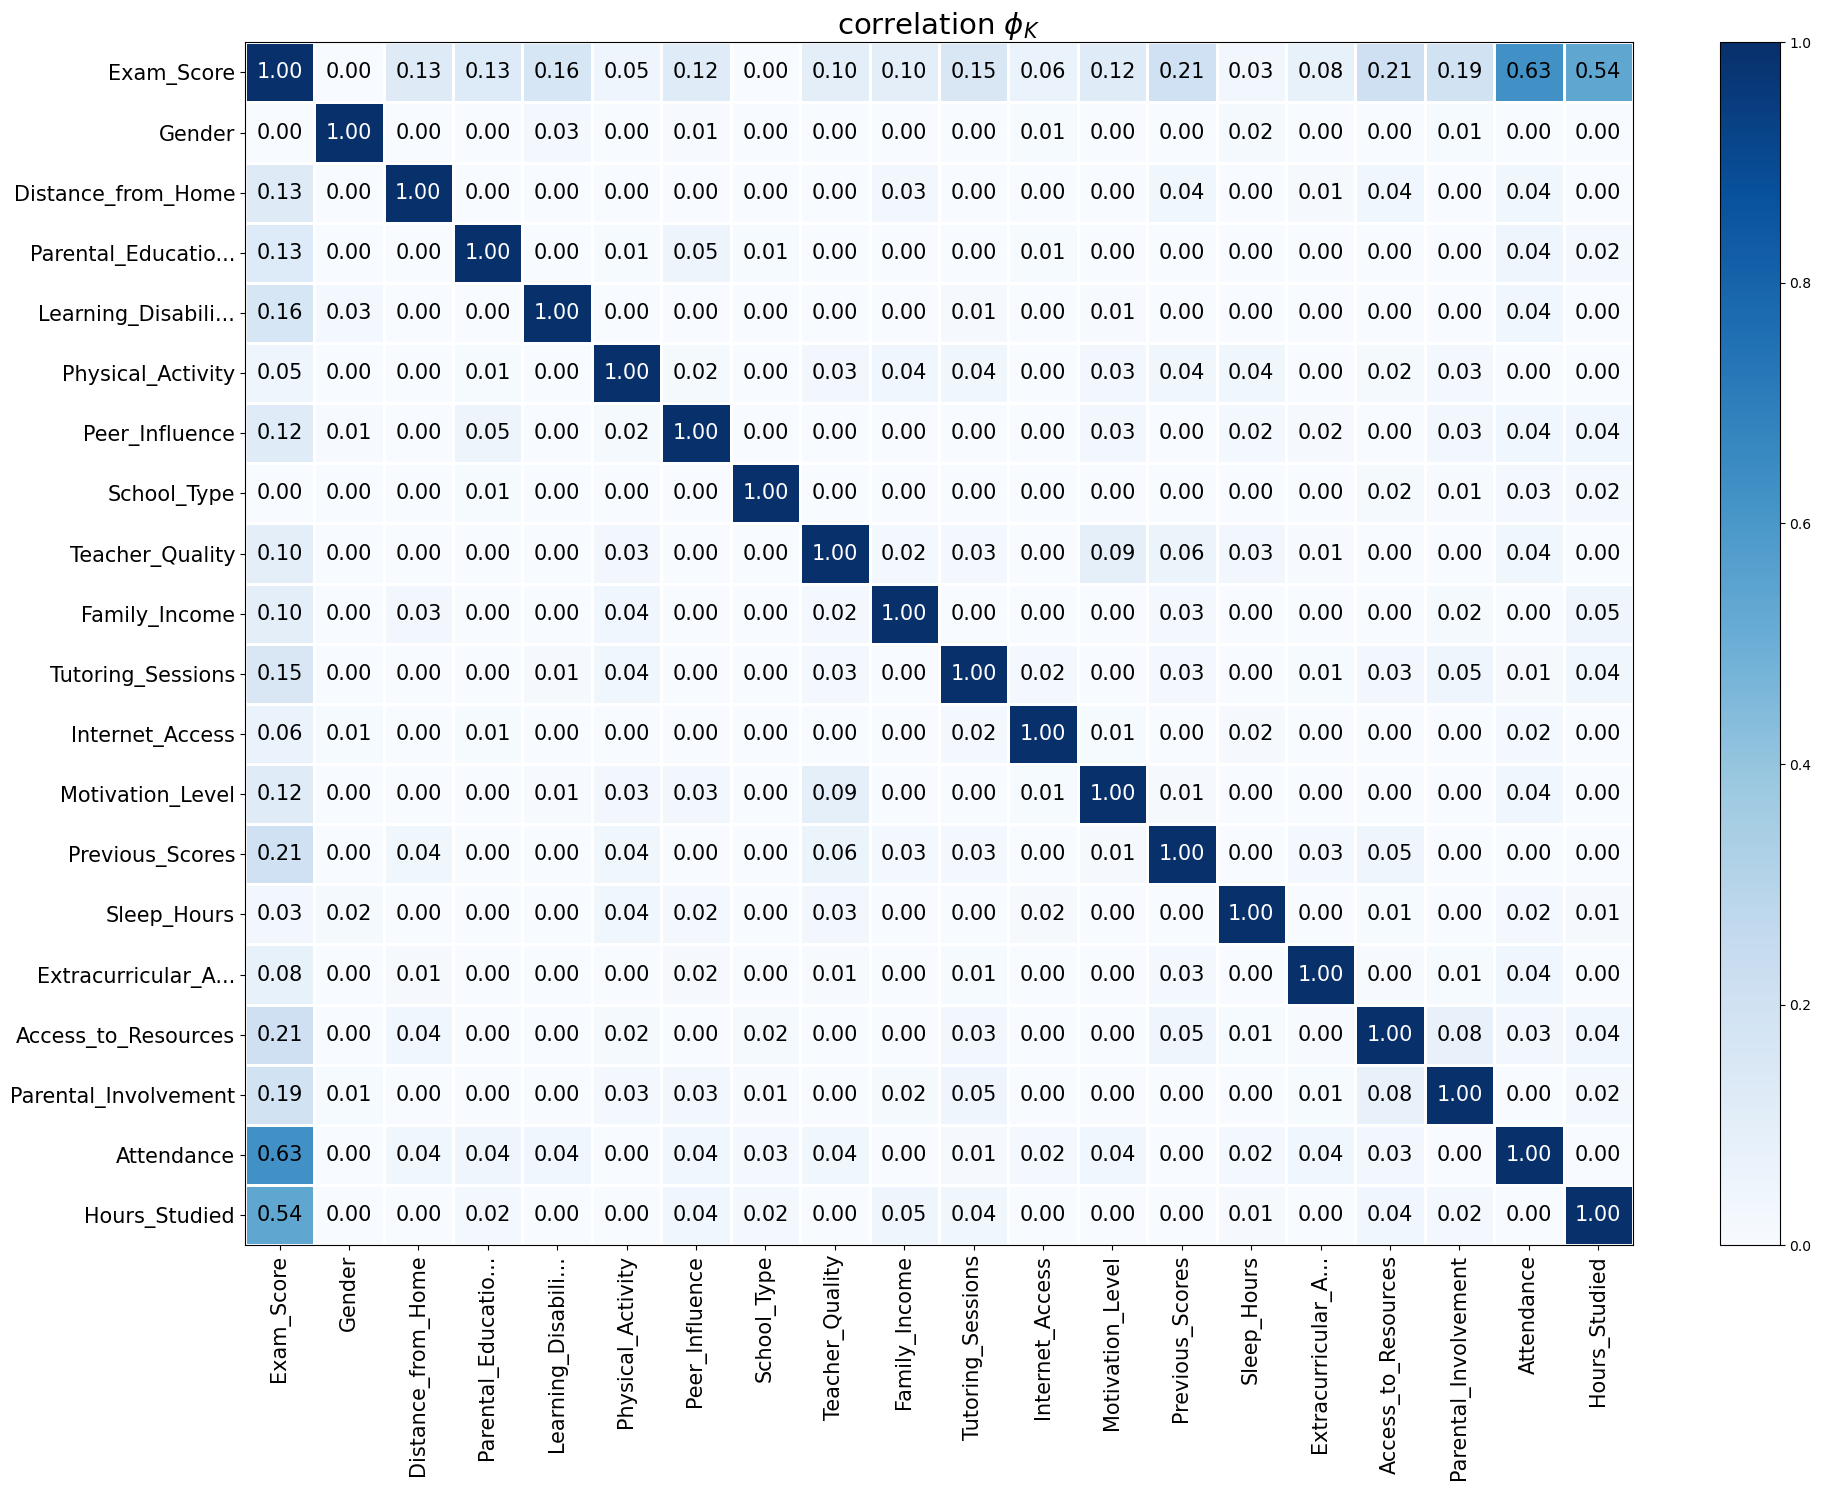

In [29]:
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(20,15))
plt.tight_layout()

Berdasarkan informasi diatas, terdapat 2 *features* yang tidak memiliki korelasi dengan *target*, yaitu `Gender` dan `School_Type`. Maka, mereka dapat di *drop* sehingga menghasilkan performa yang bagus pada *modeling*.

In [72]:
df_capped = df_capped.drop(['Gender', 'School_Type'], axis=1)

### Split into Training and Testing Data

In [73]:
#Splitting training & testing set

X = df_capped.drop(['Exam_Score'], axis=1)
y = df_capped['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 65)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (5102, 17)
Test Size (1276, 17)


### Split Features Selection into Numeric and Category

Biasanya berguna untuk beberapa hal
- Melakukan inferensiasi
- Melakukan pipiline ketika menggunakan **make_pipeline()**

In [74]:
# display columns
daftar = []
colom = list(X_train.columns)

for col in colom:
    daftar.append([col, X_train[col].unique()])

pd.DataFrame(columns=['kolom', 'nilai unik'], data=daftar)

,kolom,nilai unik
0,Hours_Studied,"[19.0, 21.0, 12.0, 14.0, 15.0, 23.0, 18.0, 27...."
1,Attendance,"[90, 66, 61, 67, 76, 81, 79, 63, 75, 69, 88, 9..."
2,Parental_Involvement,"[Medium, High, Low]"
3,Access_to_Resources,"[High, Medium, Low]"
4,Extracurricular_Activities,"[Yes, No]"
5,Sleep_Hours,"[5, 7, 6, 10, 9, 8, 4]"
6,Previous_Scores,"[90, 56, 75, 54, 80, 96, 55, 69, 64, 92, 58, 8..."
7,Motivation_Level,"[Low, Medium, High]"
8,Internet_Access,"[Yes, No]"
9,Tutoring_Sessions,"[0, 1, 2, 3, 4, 5, 6, 7, 8]"


In [75]:
# numerik
num_columns = X_train[[
       'Hours_Studied', 'Attendance', 'Sleep_Hours',
       'Previous_Scores', 'Physical_Activity'
]].columns.tolist()

# nominal
nom_columns = X_train[[
       'Extracurricular_Activities', 'Internet_Access', 'Tutoring_Sessions', 
       'Peer_Influence', 'Learning_Disabilities'
]].columns.tolist()

# ordinal
ord_columns = X_train[[
       'Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 
       'Family_Income', 'Teacher_Quality', 
       'Parental_Education_Level', 'Distance_from_Home'
]].columns.tolist()

print('Numeric Columns : ', num_columns)
print('Nominal Columns : ', nom_columns)
print('Ordinal Columns : ', ord_columns)

Numeric Columns :  ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Physical_Activity']
Nominal Columns :  ['Extracurricular_Activities', 'Internet_Access', 'Tutoring_Sessions', 'Peer_Influence', 'Learning_Disabilities']
Ordinal Columns :  ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']


In [76]:
#split numerical and categorical columns

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_nom = X_train[nom_columns]
X_test_nom = X_test[nom_columns]

X_train_ord = X_train[ord_columns]
X_test_ord = X_test[ord_columns]

### Pipeline

In [77]:
# scaling data numerik, StandarScaler() digunakan pada data berdistribusi normal
scaler = StandardScaler()

# encode data nominal
onehot = OneHotEncoder(handle_unknown="ignore",sparse_output=False)

# encode data ordinal
ordina = OrdinalEncoder(categories=[['Low', 'Medium', 'High'],
                                    ['Low', 'Medium', 'High'],
                                    ['Low', 'Medium', 'High'],
                                    ['Low', 'Medium', 'High'],
                                    ['Low', 'Medium', 'High'],
                                    ['High School', 'College', 'Postgraduate'],
                                    ['Near', 'Moderate', 'Far']])

# Transform data train untuk piping line
preprocess = ColumnTransformer(transformers=[
    ('pipe_num', scaler, num_columns),
    ('pipe_nom', onehot, nom_columns),
    ('pipe_ord', ordina, ord_columns)],
    remainder='passthrough' # untuk mengabaikan kategorical yg sdh di encode
)

In [78]:
# Model Definition using pipeline

pipe_knn = make_pipeline(preprocess,KNeighborsRegressor())
pipe_svr = make_pipeline(preprocess,SVR())
pipe_dt = make_pipeline(preprocess,DecisionTreeRegressor())
pipe_rf = make_pipeline(preprocess,RandomForestRegressor())
pipe_ada = make_pipeline(preprocess,AdaBoostRegressor())

# Modeling

### Model Validation

In [79]:
# Model fitting

pipe_knn.fit(X_train, y_train)
pipe_svr.fit(X_train, y_train) 
pipe_dt.fit(X_train, y_train) 
pipe_rf.fit(X_train, y_train) 
pipe_ada.fit(X_train, y_train) 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_num', StandardScaler(),
                                                  ['Hours_Studied',
                                                   'Attendance', 'Sleep_Hours',
                                                   'Previous_Scores',
                                                   'Physical_Activity']),
                                                 ('pipe_nom',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Extracurricular_Activities',
                                                   'Internet_Access',
                                                   'Tutoring_Sessions',
                                                   'Peer...
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Low',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Low',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Low',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['High '
                                                                              'School',
                                                                              'College',
                                                                              'Postgraduate'],
                                                                             ['Near',
                                                                              'Moderate',
                                                                              'Far']]),
                                                  ['Parental_Involvement',
                                                   'Access_to_Resources',
                                                   'Motivation_Level',
                                                   'Family_Income',
                                                   'Teacher_Quality',
                                                   'Parental_Education_Level',
                                                   'Distance_from_Home'])])),
                ('adaboostregressor', AdaBoostRegressor())])

In [80]:
# Define Cross Validation for each model

skfold = 5 # menentukan banyaknya split data 

# scoring artinya model evaluasi yang digunakan pada proses validasi data
# n_jobs=-1 artinya komputasi bekerja secara serentak
# cv artinya banyaknya split data
cv_knn_model = cross_val_score(pipe_knn, X_train, y_train, cv = skfold, scoring='r2', n_jobs=-1)
cv_svm_model = cross_val_score(pipe_svr, X_train, y_train, cv = skfold, scoring='r2', n_jobs=-1)
cv_dt_model = cross_val_score(pipe_dt, X_train, y_train, cv = skfold, scoring='r2', n_jobs=-1)
cv_rf_model = cross_val_score(pipe_rf, X_train, y_train, cv = skfold, scoring='r2', n_jobs=-1)
cv_ada_model = cross_val_score(pipe_ada, X_train, y_train, cv = skfold, scoring='r2', n_jobs=-1)

In [39]:
# Finding Best Model based on Cross_Val_Score based on mean

name_model = []
cv_scores = 0
for cv, name in zip([cv_knn_model, cv_svm_model, cv_dt_model, cv_rf_model, cv_ada_model],
                   ['knn_model', 'svm_model', 'dt_model', 'rf_model', 'ada_model']):
  print(name)
  print('f1score - Cross Validation - All :', cv)
  print('f1score - Cross Validation - Mean :', cv.mean())
  print('f1score - Cross Validation - std :', cv.std())
  print('f1score - Range of Test Set :', (cv.mean()-cv.std()), '-' , (cv.mean()+cv.std()))
  print('-'*50)
  if cv.mean() > cv_scores:
    cv_scores = cv.mean()
    name_model = name
  else:
    pass
print(f'Berdasarkan validasi data yang telah dilakukan dengan menggunakan berbagai model, \n{name_model} merupakan algoritma terbaik yang layak digunakan dalam pengembangan di modeling dan hyperparameter tuning')
print(f'\nCross Validation Score berdasarkan mean: {cv_scores}')

knn_model
f1score - Cross Validation - All : [0.44783615 0.58852363 0.50049938 0.5707717  0.53180886]
f1score - Cross Validation - Mean : 0.5278879437115238
f1score - Cross Validation - std : 0.05037757438788272
f1score - Range of Test Set : 0.4775103693236411 - 0.5782655180994065
--------------------------------------------------
svm_model
f1score - Cross Validation - All : [0.60790847 0.77733214 0.66153926 0.78262945 0.72608982]
f1score - Cross Validation - Mean : 0.711099831572825
f1score - Cross Validation - std : 0.06757604846454397
f1score - Range of Test Set : 0.643523783108281 - 0.778675880037369
--------------------------------------------------
dt_model
f1score - Cross Validation - All : [ 0.13078429  0.07022323  0.12911132  0.15074883 -0.26932062]
f1score - Cross Validation - Mean : 0.042309411988318724
f1score - Cross Validation - std : 0.15812270045365362
f1score - Range of Test Set : -0.1158132884653349 - 0.20043211244197234
-----------------------------------------------

### Hyperparameter Tuning 

> Normalisasi data dengan *scaling* dan *encoding* perlu dilakan sebelum **Hyperparameter Tuning** karena **Pipeline** hanya berfungsi untuk memangkas/efisiensi waktu pada proses *fitting* dan *transforming*, terutaman ketika perlu dilakukan perbandingan pemilihan model terbaik. Terlebih lagi, parameter di model pada **Pipeline** masih dalam kondisi dasar. Terdapat cara penggunaan **Pipeline** sekaligus untuk **Hyperparameter Tuning**, yaitu menggunakan *Pipeline()*. Tetapi, metode tersebut masih memiliki kekurangan yaitu tidak dapat memproses data yang berada dalam ColumnTransformer, artinya dia hanya mampu *piping line* untuk sekali normalisasi dan tidak bisa mencapurkan berbagai tipe kolom ke dalam *piping line*.

In [81]:
# Normalization data for hyperparameter tuning

# Scaling
sc = StandardScaler()
sc.fit(X_train_num)
X_train_numscaled = sc.transform(X_train_num)
X_test_numscaled = sc.transform(X_test_num)

# Nominaling
no = OneHotEncoder(handle_unknown="ignore",sparse_output=False)
no.fit(X_train_nom)
X_train_nomscaled = no.transform(X_train_nom)
X_test_nomscaled = no.transform(X_test_nom)

# Ordinaling
ordi = OrdinalEncoder(categories=[['Low', 'Medium', 'High'],
                                  ['Low', 'Medium', 'High'],
                                  ['Low', 'Medium', 'High'],
                                  ['Low', 'Medium', 'High'],
                                  ['Low', 'Medium', 'High'],
                                  ['High School', 'College', 'Postgraduate'],
                                  ['Near', 'Moderate', 'Far']])
ordi.fit(X_train_ord)
X_train_ordscaled = ordi.transform(X_train_ord)
X_test_ordscaled = ordi.transform(X_test_ord)

X_train_final = np.concatenate([X_train_numscaled, X_train_nomscaled, X_train_ordscaled], axis = 1)
X_test_final = np.concatenate([X_test_numscaled, X_test_nomscaled, X_test_ordscaled], axis = 1)

In [82]:
parameter = {'kernel': ['linear', 'rbf'], # metode yang digunakan untuk transformasi data untuk di analisis dalam sudut pandang dimensi tingkat tinggi
             'C': [0.1, 1, 10], # penalti parameter, semakin kecil menghasilkan margin data besar, begitupun sebaliknya
             'gamma': [0.1, 1, 10]} # kontrol tiap sample terhadap decision boundary, semakin kecil semakin smooth dalam membatasi data, begitupun sebaliknya

In [83]:
# Train with RandomizedSearchCV karena memiliki keunggulan yaitu efisiensi waktu dalam menentukan parameter terbaik

svr_randomcv = RandomizedSearchCV(estimator=SVR(),
                                  param_distributions=parameter,
                                  cv=3,
                                  n_jobs=-1,
                                  random_state=67,
                                  scoring='r2')

svr_randomcv.fit(X_train_final, y_train)

RandomizedSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': [0.1, 1, 10],
                                        'kernel': ['linear', 'rbf']},
                   random_state=67, scoring='r2')

In [84]:
# Hasil parameter terbaik untuk modeling
svr_randomcv.best_params_

{'kernel': 'linear', 'gamma': 0.1, 'C': 10}

### Model Evaluation

In [85]:
# Semacam fitting terbaik untuk modeling
best_predict = svr_randomcv.best_estimator_

In [86]:
# Prediksi nilai berdasarkan data train dan test yang tersedia
y_pred_train_baseline = pipe_svr.predict(X_train)
y_pred_test_baseline = pipe_svr.predict(X_test)

y_pred_train = best_predict.predict(X_train_final)
y_pred_test = best_predict.predict(X_test_final)

In [87]:
# Perbandingan sebelum dan sesudah Hyperparameter Tuning
print('Sebelum Hyperparameter Tuning')
print(f'Hasil evaluasi menggunakan R2 Score pada data train: {r2_score(y_pred_train_baseline, y_train)}')
print(f'Hasil evaluasi menggunakan R2 Score pada data test: {r2_score(y_pred_test_baseline, y_test)}')

print('\nSetelah Hyperparameter Tuning')
print(f'Hasil evaluasi menggunakan R2 Score pada data train: {r2_score(y_pred_train, y_train)}')
print(f'Hasil evaluasi menggunakan R2 Score pada data test: {r2_score(y_pred_test, y_test)}')

Sebelum Hyperparameter Tuning
Hasil evaluasi menggunakan R2 Score pada data train: 0.5883291656171982
Hasil evaluasi menggunakan R2 Score pada data test: 0.6176029048156277

Setelah Hyperparameter Tuning
Hasil evaluasi menggunakan R2 Score pada data train: 0.603021090837393
Hasil evaluasi menggunakan R2 Score pada data test: 0.6624117471481124


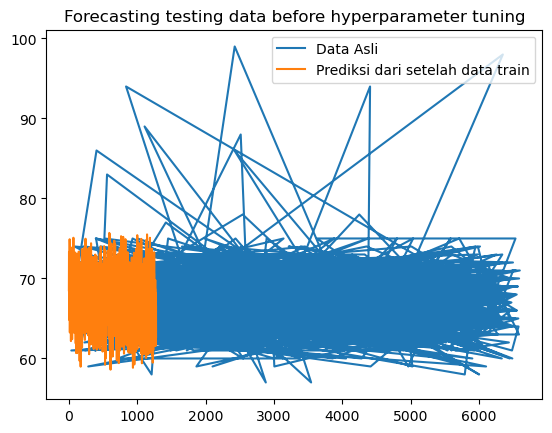

In [91]:
# plot lines hasil prediksi dalam 95 weeks (rows)
plt.plot(y_test, label = "Data Asli")
plt.plot(y_pred_test_baseline, label = "Prediksi dari setelah data train")
plt.title('Forecasting testing data before hyperparameter tuning')
plt.legend()
plt.show()

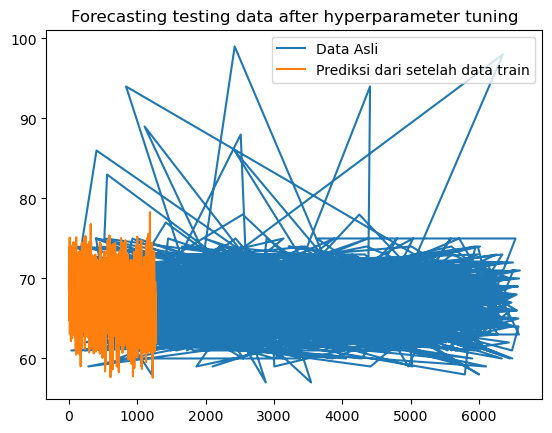

In [92]:
# plot lines hasil prediksi dalam 95 weeks (rows)
plt.plot(y_test, label = "Data Asli")
plt.plot(y_pred_test, label = "Prediksi dari setelah data train")
plt.title('Forecasting testing data after hyperparameter tuning')
plt.legend()
plt.show()

### Model Saving

In [95]:
#Save the files

with open('num_columns.txt', 'w') as file_1:
    json.dump(num_columns, file_1)

with open('ord_columns.txt', 'w') as file_2:
    json.dump(ord_columns, file_2)

with open('nom_columns.txt', 'w') as file_3:
    json.dump(nom_columns, file_3)

with open('pipe_svr.pkl', 'wb') as file_4:
    pickle.dump(pipe_svr, file_4)

with open('sc.pkl', 'wb') as file_5:
    pickle.dump(sc, file_5)

with open('no.pkl', 'wb') as file_6:
    pickle.dump(no, file_6)

with open('ordi.pkl', 'wb') as file_7:
    pickle.dump(ordi, file_7)

with open('svr_randomcv.pkl', 'wb') as file_8:
    pickle.dump(svr_randomcv, file_8)

# Conclusion

Berdasarkan analisis model yang telah dilakukan, diketahui bahwa **Support Vector Machine** merupakan algoritma terbaik yang dapat digunakan untuk *modeling* melihat pada proses *pipeline* hingga validasi model karena memiliki *mean* yang tinggi namun *standar deviasi* yang rendah. Kemudian, pada *model evaluation* diketahui secara garis besar model masih cenderung *underfit* ketika di evaluasi menggunakan metrik *R2 Score* karena *hyperparameter tuning* yang dilakukan menggunakan *RandomizedSearchCV* dimana hanya mengambil sampel secara acak untuk menetukan parameter terbaik pada model.  
**Kelemahan**  
Penggunaan RandomizedSearchCV dikarenakan kelemahan dari model dari **Support Vector Machine** dimana membutuhkan performa perangkat yang tinggi untuk dapat menjalankan, termasuk *hyperparameter tuning* hingga maksimal. Dengan kelemahan pada perangkat dan beratnya proses *hyperparameter tuning*, maka hanya sedikit parameter yang dapat digunakan demi efisiensi dan efektifitas.  
**Kelebihan**  
**Support Vector Machine** merupakan algoritma dengan performa terbaik yang bukan hanya berdasarkan hasil *model validation*, tetapi juga dapat digunakan untuk analisis data klasifikasi maupun regresi. Adanya *kernel* sangat membantu **Support Vector Machine** sehingga dapat lebih fleksibel untuk berhadapan dengan berbagai jenis pola data yang rumit untuk di *handle*.  
**Improvement**  
Berdasarkan kelemahan pada **Support Vector Machine**, maka terdapat cara untuk mengantisipasi kemungkinan terburuk yang terjadi, yaitu memiliki perangkat yang mumpuni untuk menjalankan model atau *modeling* sedini mungkin sehingga dapat melakukan *hyperparameter tuning* secara maksimal.

Berdasarkan eksplorasi data yang telah dilakukan, terdapat beberapa informasi menarik yang dapat disampaikan, yaitu *Hours Studied* dan *Attendance* merupakan faktor utama yang memengaruhi hasil ujian yang diperoleh tiap siswa berdasarkan uji korelasi menggunakan *phik*. Dengan kedua faktor tersebut menjadi pengaruh yang besar, setelah dilakukan analisis terdapat informasi bahwa jam belajar dan persentase hadir ke kelas yang ideal yaitu sekitar 24 jam/minggu dan 90% kehadiran. Selain itu, jarak tempuh yang dilalui mayoritas siswa dari rumah menuju sekolah cukup dekat. Kemudian, motivasi siswa dalam belajar memengaruhi hasil ujian yang diperoleh. Ini akan menjadi tantangan bagi berbagai pihak agar siswa termotivasi untuk belajar demi mencetak **Generasi Emas Indonesia 2045**. Selanjutnya, peran orang tua penting dalam belajar memengaruhi pembelajaran siswa. Hal itu disebabkan sehebat apapun guru dalam mengajar, orang tua merupakan satu-satunya orang yang paling dekat dan mengenal anaknya sendiri sehingga penting dalam pendidikan.

Berdasarkan informasi diatas, *Hours Studied* dan *Attendance* merupakan faktor yang memengaruhi secara langsung terkait hasil ujian yang diperoleh tiap siswa. Meskipun begitu, terdapat rekomendasi pihak sekolah, orang tua, dan pihak lainnya untuk dapat menunjang dalam memengaruhi siswa sehingga memperoleh hasil ujian yang tinggi, yaitu:
- **Keterlibatan orang tua**: Dalam data yang diperoleh, orang tua memiliki peran penting dalam memengaruhi hasil ujian anaknya. Hal itu hal wajar karena tidak semua orang tua memiliki waktu luang untuk bercengkrama dengan anaknya yang umumnya disebabkan tuntuan pekerjaan atau hal lainnya. Meskipun begitu, orang tua adalah yang paling mengenal anaknya sehingga mereka sangat paham terkait faktor baik buruk perilaku yang dialami anaknya. Maka, sudah sepantasnya orang tua lebih dapat memehartikan dan mengontrol berbagai aktivitas yang dilakukan anak-anaknya.
- **Sumber daya mumpuni**: Faktor ini penting di setiap sekolah karena sangat membantu siswa yang memiliki sarana prasarana yang kurang mendukung dirumahnya dalam pembelajaran, baik itu perpustakaan, akses internet, dan lain-lain.
- **Sesi Tutor bersama teman/orang sepaham**: Faktor ini penting karena tidak semua murid mampu menerima materi yang disampaikan para guru dengan cara mengajar yang dibawakan para guru. Oleh karena itu, biasanya para murid mencari para mentor yang dapat memahami mereka terkait cara menguasai materi pembelajaran, baik itu temannya sendiri, mencari pengajar yang berkarir di luar lingkup sekolahnya, atau melakukan sesi privat dengan guru sewaktu sekolah di luar jam belajar jika guru tersebut berkenan.
- **Sumber daya untuk para disabilitas**: Faktor ini penting karena dapat menunjang para disabilitas dalam pembelajaran di sekolah sehingga mereka memiliki peluang yang sama untuk dapat mencapai hasil ujian yang bagus.